# Air Quality Analysis and Forecast for Selected Cities in Cavite (2025)

## Introduction

This project focuses on analyzing and forecasting air quality data from selected major cities in Cavite, Philippines, covering the period from **January to May 2025**. The study aims to support:

- **SDG 13: Climate Action**
- **SDG 3: Good Health and Well-Being**

By monitoring air pollution trends and identifying key pollutants, this analysis provides insights into public health risks and supports sustainable environmental policies.

The project performs:

- Statistical analysis
- Symbolic regression (SymPy)
- Forecasting (NumPy)
- Visualization (Matplotlib)

---

## Data Overview

- **Dataset Source:** [Philippine Cities Air Quality Index Data 2025 (Kaggle)](https://www.kaggle.com/datasets/bwandowando/philippine-cities-air-quality-index-data-2025/data)
- **Focus Cities:**
  - Bacoor
  - Cavite City
  - General Trias
  - Tagaytay City
- **Data Period:** January to May 2025

---

## Dataset Structure

| Column Name | Description |
|--------------|-------------|
| `datetime` | Timestamp |
| `main.aqi` | Overall AQI Index |
| `components.co` | Carbon Monoxide (CO) |
| `components.no` | Nitric Oxide (NO) |
| `components.no2` | Nitrogen Dioxide (NO₂) |
| `components.o3` | Ozone (O₃) |
| `components.so2` | Sulfur Dioxide (SO₂) |
| `components.pm2_5` | PM2.5 (μg/m³) |
| `components.pm10` | PM10 (μg/m³) |
| `components.nh3` | Ammonia (NH₃) |
| `city_name` | City Name |

---

The dataset contains both **overall AQI** and **individual pollutant component values** which are used for both descriptive and predictive analysis.

---



## What is Air Quality Index (AQI)?

The Air Quality Index (AQI) is a standardized scale used worldwide to communicate how clean or polluted the air is at a specific location. The AQI combines the concentrations of various air pollutants into a single numerical value that reflects potential health risks.

- **Lower AQI values** (typically 0–50) indicate good air quality.
- **Higher AQI values** (above 100) suggest increasing levels of pollution and associated health concerns.
- AQI levels are primarily influenced by the concentrations of certain harmful pollutants.

---

## Why Does This Matter?

- Air pollution is a major contributor to respiratory illnesses, cardiovascular diseases, and premature deaths globally.
- In densely populated and urbanizing regions like Cavite, continuous monitoring of air quality is crucial to:
  - Protect public health
  - Inform local government policy decisions
  - Raise public awareness
- This project supports national and global efforts to address climate change, sustainable urbanization, and public health, directly contributing to SDG 13 and SDG 3.

---

## What Pollutants Are Monitored?

The dataset includes several key pollutants that directly affect AQI and human health:

| Pollutant | Description | Common Sources | Health Effects |
|-----------|-------------|----------------|-----------------|
| **CO (Carbon Monoxide)** | Colorless, odorless gas | Vehicle emissions, combustion | Reduces oxygen delivery to organs |
| **NO (Nitric Oxide)** | Reactive gas | Vehicle exhaust, industry | Lung irritation |
| **NO₂ (Nitrogen Dioxide)** | Reactive nitrogen gas | Fossil fuel combustion | Respiratory inflammation |
| **O₃ (Ozone)** | Secondary pollutant (formed in atmosphere) | Chemical reactions with sunlight | Asthma, breathing problems |
| **SO₂ (Sulfur Dioxide)** | Sulfur-based gas | Power plants, fuel burning | Respiratory irritation |
| **PM2.5 (Particulate Matter ≤ 2.5 µm)** | Fine particles | Smoke, dust, vehicles | Deep lung penetration, serious respiratory & cardiac issues |
| **PM10 (Particulate Matter ≤ 10 µm)** | Coarse particles | Dust, construction | Breathing issues, throat irritation |
| **NH₃ (Ammonia)** | Nitrogen-based gas | Agriculture, industry | Eye & lung irritation |

---

## How Do We Know If AQI is Bad or Good?

Unlike the common US EPA AQI scale (0–500), this dataset uses the OpenWeather 5-Level AQI Scale, which assigns AQI levels based on specific pollutant concentration ranges.

| AQI Index | Air Quality Level | Description |
|------------|--------------------|-------------|
| 1 | Good | Air quality is ideal and poses little or no risk. |
| 2 | Fair | Acceptable air quality; some pollutants may be slightly elevated. |
| 3 | Moderate | Air quality may affect sensitive individuals. |
| 4 | Poor | Unhealthy air quality, potential health risks for the general population. |
| 5 | Very Poor | Hazardous air quality; high risk of health effects for everyone. |

---

### OpenWeather Pollutant Concentration Thresholds

| Pollutant | Good (1) | Fair (2) | Moderate (3) | Poor (4) | Very Poor (5) |
|------------|----------|----------|-------------|---------|------------|
| SO₂ (μg/m³) | 0–20 | 20–80 | 80–250 | 250–350 | ≥350 |
| NO₂ (μg/m³) | 0–40 | 40–70 | 70–150 | 150–200 | ≥200 |
| PM10 (μg/m³) | 0–20 | 20–50 | 50–100 | 100–200 | ≥200 |
| PM2.5 (μg/m³) | 0–10 | 10–25 | 25–50 | 50–75 | ≥75 |
| O₃ (μg/m³) | 0–60 | 60–100 | 100–140 | 140–180 | ≥180 |
| CO (μg/m³) | 0–4400 | 4400–9400 | 9400–12400 | 12400–15400 | ≥15400 |

> Note: NH₃ (Ammonia) and NO (Nitric Oxide) are also measured but do not directly contribute to the AQI score in this scale.

---

### Interpretation for This Study

- Since the AQI values observed in this dataset range mostly between **1 and 3**, most locations in Cavite generally experienced **Good to Moderate air quality**.
- This scale allows for more fine-grained assessment, particularly useful for early-stage air pollution monitoring in developing urban regions like Cavite.
- Even small shifts from AQI 2 to AQI 3 can still represent significant increases in pollutant concentrations, especially for sensitive groups.

---

## Data Preprocessing and Filtering

The original dataset contains daily air quality data for multiple cities across the Philippines, organized into separate monthly folders. Since this project focuses only on selected cities in Cavite, the following preprocessing steps were performed:

### Dataset Sources

- The data was originally split into 5 monthly folders: `202501` (January) to `202505` (May).
- Each folder contained a combined dataset named: `{folder}_CombinedData.csv`.

### Target Cities for Analysis

The following cities from Cavite province were selected for analysis:

- Cavite City
- Bacoor
- General Trias
- Tagaytay City

### Data Extraction and Combination Process

A Python script was developed to:

1. Filter the data to keep only rows where the `city_name` belongs to the selected Cavite cities.
2. Concatenate the filtered data from all months into a single combined DataFrame.
3. Validate that all target cities are present in the combined data.
4. Save the filtered Cavite data into a new file: `cavite_combined_data.csv`


In [1]:
import pandas as pd
import os

folders = ["202501", "202502", "202503", "202504", "202505"]
data = []

cavite_cities = ["Cavite City", "Bacoor","General Trias", "Tagaytay City"]

# Combine data for Cavite cities in a single DataFrame

for folder in folders:
    file_path = os.path.join("archive", folder, folder, f"{folder}_CombinedData.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        data.append(df)
    else:
        print(f"File not found: {file_path}, skipping.")


combined_data = pd.concat(data, ignore_index=True)

cavite_data = combined_data[combined_data["city_name"].isin(cavite_cities)]

if all(city in cavite_data['city_name'].values for city in cavite_cities):
    print("All Selected Cavite cities found in the data.")
    print(cavite_data['city_name'].unique())

# Print the shape and columns of the data
# print(cavite_data.shape)
# print(cavite_data.columns)

# Save the filtered data to a new CSV file
output_file = "cavite_combined_data.csv"
cavite_data.to_csv(output_file, index=False)


All Selected Cavite cities found in the data.
['Bacoor' 'Cavite City' 'General Trias' 'Tagaytay City']


city_name     Bacoor  Cavite City  General Trias  Tagaytay City
datetime                                                       
2025-01-31  2.467914     2.467914       2.163102       1.858289
2025-02-28  2.704663     2.704663       2.302326       1.968992
2025-03-31  2.504711     2.503365       1.838710       1.654105
2025-04-30  2.201669     2.202778       1.755216       1.616667
2025-05-31  1.240591     1.241240       1.185484       1.189516


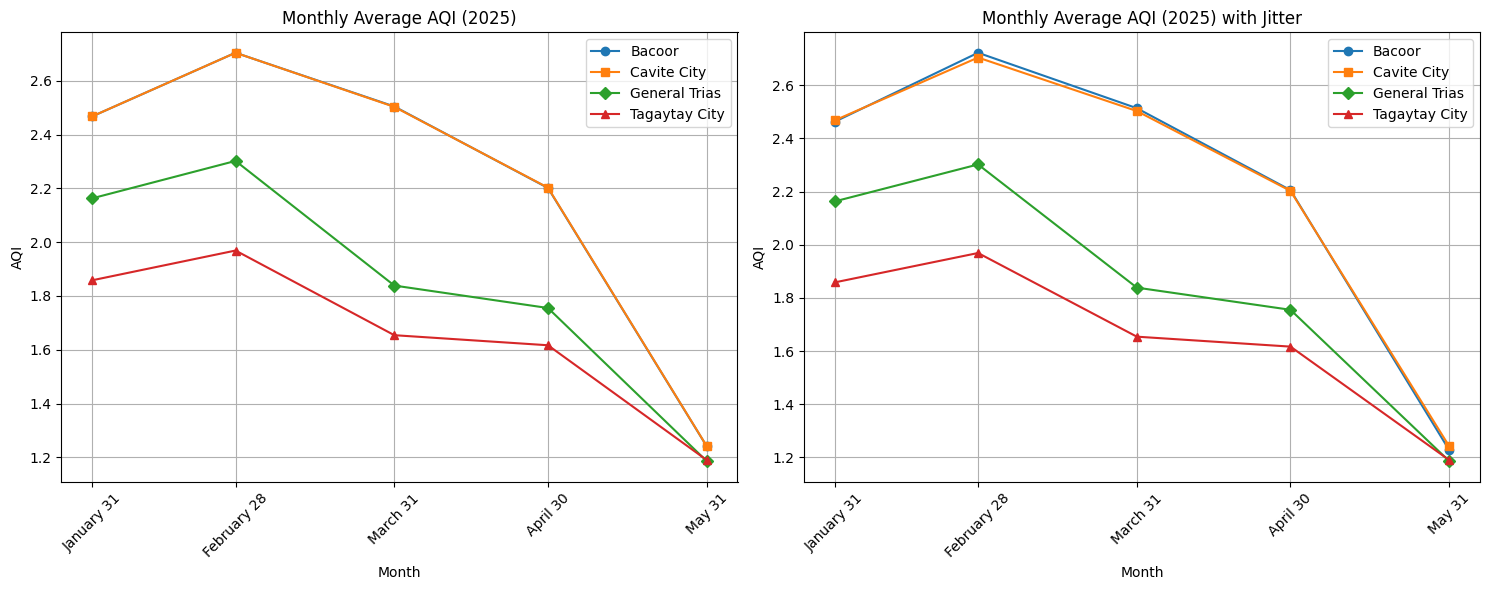

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

cavite_data = pd.read_csv("cavite_combined_data.csv")

cavite_data['datetime'] = pd.to_datetime(cavite_data['datetime']).dt.tz_localize(None)

cavite_data = cavite_data.set_index('datetime')

monthly_avg = cavite_data.groupby('city_name').resample('ME').mean().reset_index()

aqi_pivot = monthly_avg.pivot(index='datetime', columns='city_name', values='main.aqi')

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

markers = ['o', 's', 'D', '^']

# normal AQI
for i, city in enumerate(aqi_pivot.columns):
    axs[0].plot(aqi_pivot.index, aqi_pivot[city], marker=markers[i], label=city)

date_format = mdates.DateFormatter("%B %d")
axs[0].xaxis.set_major_formatter(date_format)
axs[0].set_title("Monthly Average AQI (2025)")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("AQI")
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xticks(aqi_pivot.index)

axs[0].legend()
axs[0].grid()

print(aqi_pivot)

aqi_pivot_jittered = aqi_pivot.copy()
np.random.seed(42)
aqi_pivot_jittered['Bacoor'] += np.random.uniform(-0.02, 0.02, size=len(aqi_pivot_jittered))

# jittered AQI
for i, city in enumerate(aqi_pivot_jittered.columns):
    axs[1].plot(aqi_pivot_jittered.index, aqi_pivot_jittered[city], marker=markers[i], label=city)

axs[1].xaxis.set_major_formatter(date_format)
axs[1].set_title("Monthly Average AQI (2025) with Jitter")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("AQI")
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xticks(aqi_pivot.index)
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


## Monthly AQI Trends

### Objective

Analyze the monthly trend of AQI for the selected Cavite cities (Bacoor, Cavite City, General Trias, and Tagaytay City) from January to May 2025.

--- 

### Data Preparation

- The `datetime` column was converted into proper date format using `pandas.to_datetime()`, and timezone information was removed for consistency.
- Monthly averages were calculated using `pandas.resample('ME')` to aggregate daily AQI readings into month-end averages.
- The resulting monthly averages were pivoted into a table structure for easier multi-city comparison.

---

### Monthly Average AQI Values (January–May 2025)

| Month | Bacoor | Cavite City | General Trias | Tagaytay City |
|-------|--------|-------------|----------------|----------------|
| 2025-01-31 | 2.47 | 2.47 | 2.16 | 1.86 |
| 2025-02-28 | 2.70 | 2.70 | 2.30 | 1.97 |
| 2025-03-31 | 2.50 | 2.50 | 1.84 | 1.65 |
| 2025-04-30 | 2.20 | 2.20 | 1.76 | 1.62 |
| 2025-05-31 | 1.24 | 1.24 | 1.19 | 1.19 |

---

### Jitter Technique for Visualization

- **Issue:** Bacoor and Cavite City AQI values are nearly identical, causing their plot lines to completely overlap.
- **Solution:** Applied **jitter** to Bacoor’s AQI values for visualization purposes.
  - Random noise (±0.02) was added using `numpy.random.uniform()` to slightly shift Bacoor’s plotted values.
  - The jitter does not affect the actual statistical analysis and is purely for visual separation.

---

#### **Monthly Average AQI (Without Jitter)**

- Plots the true monthly AQI values for all four cities.
- Shows Bacoor and Cavite City completely overlapping due to identical trends.

#### **Monthly Average AQI (With Jitter Applied)**

- Jitter added to Bacoor allows all four cities to be distinguishable on the plot.
- Highlights the consistent pattern across the cities.

---

### Insights from Monthly AQI Trends

- Bacoor and Cavite City exhibit almost identical AQI patterns throughout the period.
- General Trias and Tagaytay City show lower AQI levels consistently.
- All cities generally show a decreasing AQI trend from January to May 2025, suggesting improving air quality during the period.



City: Bacoor
Equation:
3.11120182592401 - 0.295764030904068⋅month
Rate of Change (dAQI/dMonth):
-0.295764030904068

City: Cavite City
Equation:
3.11056236987876 - 0.295523452729623⋅month
Rate of Change (dAQI/dMonth):
-0.295523452729623

City: General Trias
Equation:
2.59967090349785 - 0.250234547082547⋅month
Rate of Change (dAQI/dMonth):
-0.250234547082547

City: Tagaytay City
Equation:
2.16447501775653 - 0.168987086343779⋅month
Rate of Change (dAQI/dMonth):
-0.168987086343779


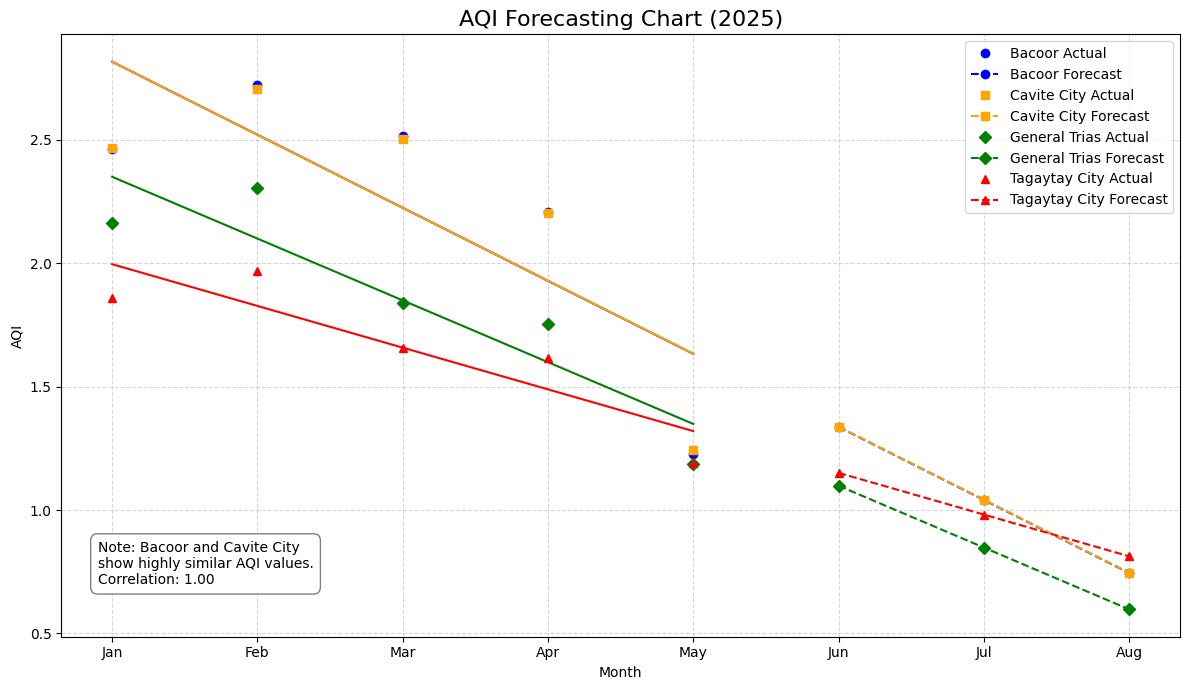

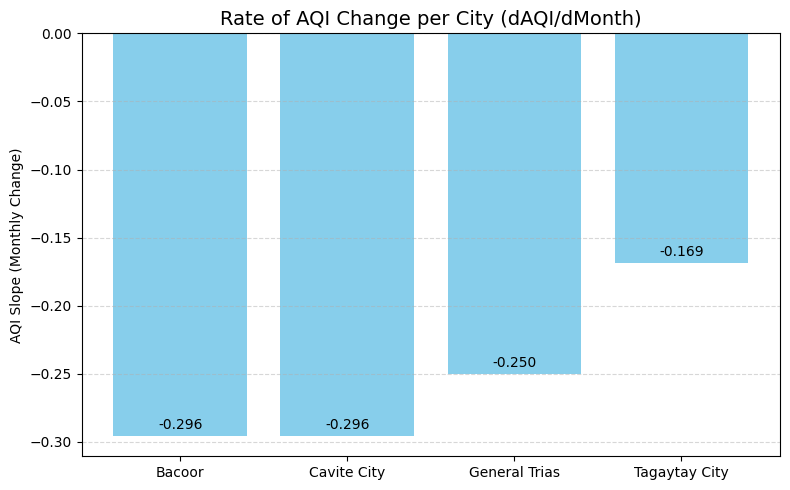

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Read Data
cavite_data = pd.read_csv("cavite_combined_data.csv")
cavite_data['datetime'] = pd.to_datetime(cavite_data['datetime']).dt.tz_localize(None)
cavite_data = cavite_data.set_index('datetime')

# Resample monthly
monthly_avg = cavite_data.groupby('city_name').resample('ME').mean().reset_index()
aqi_pivot = monthly_avg.pivot(index='datetime', columns='city_name', values='main.aqi')

future_months = np.array([6, 7, 8])
forecast_results = {}
rate_of_change = {}


aqi_pivot_jittered = aqi_pivot.copy()
np.random.seed(42)
aqi_pivot_jittered['Bacoor'] += np.random.uniform(-0.02, 0.02, size=len(aqi_pivot_jittered))

markers = ['o', 's', 'D', '^']
forecast_markers = ['o', 's', 'D', '^']
colors = ['blue', 'orange', 'green', 'red']

# AQI Forecasting Chart
plt.figure(figsize=(12, 7))

for i, city in enumerate(aqi_pivot.columns):
    city_aqi = aqi_pivot[city]
    months = np.arange(1, len(city_aqi) + 1)

    slope, intercept = np.polyfit(months, city_aqi, 1)
    rate_of_change[city] = slope

    # Symbolic form
    month_sym = sp.Symbol('month')
    aqi_expr = slope * month_sym + intercept
    print(f"\nCity: {city}")
    print("Equation:")
    sp.pprint(aqi_expr)
    print("Rate of Change (dAQI/dMonth):")
    sp.pprint(sp.diff(aqi_expr, month_sym))

    fitted_aqi = slope * months + intercept
    forecast_aqi = slope * future_months + intercept
    forecast_results[city] = forecast_aqi

    plot_aqi = aqi_pivot_jittered[city] if city == 'Bacoor' else city_aqi

    plt.plot(months, plot_aqi, marker=markers[i], linestyle='', color=colors[i], label=f'{city} Actual')
    plt.plot(months, fitted_aqi, linestyle='-', color=colors[i])
    plt.plot(future_months, forecast_aqi, marker=forecast_markers[i], linestyle='--', color=colors[i], label=f'{city} Forecast')

plt.title("AQI Forecasting Chart (2025)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("AQI")
plt.xticks(ticks=[1,2,3,4,5,6,7,8], labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

corr = aqi_pivot['Bacoor'].corr(aqi_pivot['Cavite City'])
plt.text(
    0.9, 0.7,
    f"Note: Bacoor and Cavite City\nshow highly similar AQI values.\nCorrelation: {corr:.2f}",
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5')
)

plt.show()

# Rate of Change Chart
plt.figure(figsize=(8, 5))

cities = list(rate_of_change.keys())
slopes = [rate_of_change[city] for city in cities]

bars = plt.bar(cities, slopes, color='skyblue')
plt.title("Rate of AQI Change per City (dAQI/dMonth)", fontsize=14)
plt.ylabel("AQI Slope (Monthly Change)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Forecasting and Symbolic Analysis (NumPy + SymPy)

**Linear Regression (NumPy):**

- Historical AQI data for January to May 2025 was used.
- The month index was numerically encoded as:  
  - January = 1, February = 2, ..., May = 5.
- NumPy's `polyfit()` function was used to fit a simple linear model:
  

AQI = a*{month} + b

---

**Symbolic Regression (SymPy):**

- After fitting each model, the regression equation was converted into symbolic form using SymPy.
- The symbolic derivative was computed for each city to analyze the rate of change of AQI per month.

aqi_derivative = sp.diff(aqi_expr, month_sym)

---

**Forecasting:**

- The fitted linear model was extrapolated to predict AQI values for:
  - June 2025 (Month 6)
  - July 2025 (Month 7)
  - August 2025 (Month 8)

---

**Jitter Adjustment for Visualization:**

- Bacoor and Cavite City showed nearly identical AQI values.
- Jitter was applied to Bacoor for clearer visualization without affecting model accuracy.

---

### Symbolic Regression Results

| City | Symbolic Regression Equation | Rate of Change (dAQI/dMonth) |
|------|------------------------------|-------------------------------|
| Bacoor | 3.1112 − 0.2958 ⋅ month | −0.2958 |
| Cavite City | 3.1106 − 0.2955 ⋅ month | −0.2955 |
| General Trias | 2.5997 − 0.2502 ⋅ month | −0.2502 |
| Tagaytay City | 2.1645 − 0.1690 ⋅ month | −0.1690 |

---

### Forecast Results

- All cities exhibit a decreasing AQI trend, suggesting improving air quality.
- Bacoor and Cavite City have the fastest AQI improvement rate (≈ −0.30 AQI/month).
- Tagaytay City consistently has the cleanest air and the slowest rate of change.

---

### Correlation Finding

- The correlation between Bacoor and Cavite City AQI trends is extremely high (≈ 1.00).
- This explains why their forecasted lines nearly overlap in the visualization.

---


Top pollutants for Bacoor:
components.co: 460.08
components.o3: 69.40
components.pm10: 27.63
components.pm2_5: 18.55
components.no2: 11.78
components.so2: 9.87
components.nh3: 4.30
components.no: 0.56

Top pollutants for Cavite City:
components.co: 460.67
components.o3: 69.41
components.pm10: 27.66
components.pm2_5: 18.57
components.no2: 11.81
components.so2: 9.88
components.nh3: 4.31
components.no: 0.56

Top pollutants for General Trias:
components.co: 319.48
components.o3: 60.91
components.pm10: 14.21
components.pm2_5: 10.28
components.so2: 8.26
components.no2: 8.04
components.nh3: 2.43
components.no: 0.22

Top pollutants for Tagaytay City:
components.co: 259.72
components.o3: 57.04
components.pm10: 10.86
components.pm2_5: 7.91
components.no2: 5.48
components.so2: 5.18
components.nh3: 1.43
components.no: 0.17


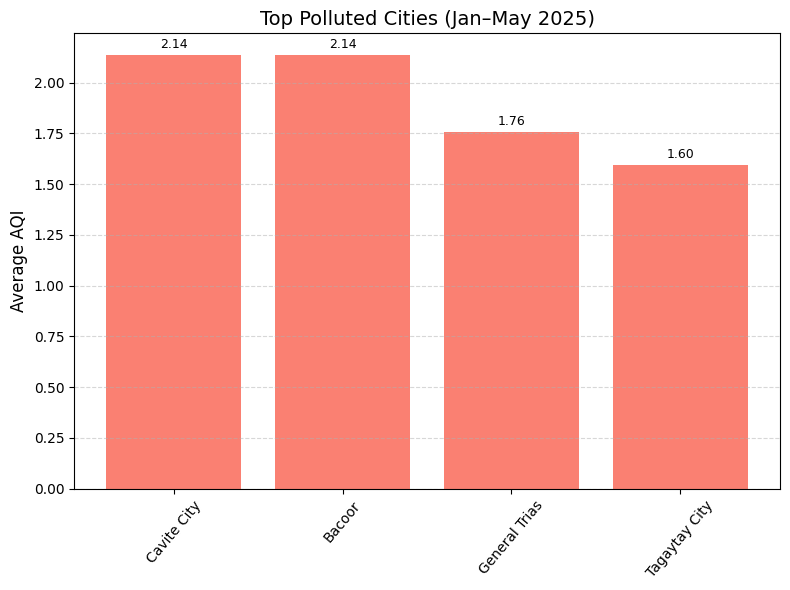

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cavite_data = pd.read_csv("cavite_combined_data.csv")

cavite_data['datetime'] = pd.to_datetime(cavite_data['datetime']).dt.tz_localize(None)
cavite_data = cavite_data.set_index('datetime')

monthly_avg = cavite_data.groupby('city_name').resample('ME').mean().reset_index()
aqi_pivot = monthly_avg.pivot(index='datetime', columns='city_name', values='main.aqi')

pollutant_cols = [
    'components.co', 'components.no', 'components.no2',
    'components.o3', 'components.so2',
    'components.pm2_5', 'components.pm10',
    'components.nh3'
]

# Compute mean pollutants per city (overall Jan-May)
pollutant_means = cavite_data.groupby('city_name')[pollutant_cols].mean()

for city in pollutant_means.index:
    city_pollutants = pollutant_means.loc[city].sort_values(ascending=False)
    print(f"\nTop pollutants for {city}:")
    for pollutant, value in city_pollutants.items():
        print(f"{pollutant}: {value:.2f}")

aqi_means = cavite_data.groupby('city_name')['main.aqi'].mean()
aqi_means = aqi_means.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
bars = plt.bar(aqi_means.index, aqi_means.values, color='salmon')

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height), 
                 xytext=(0, 3), 
                 textcoords="offset points", 
                 ha='center', va='bottom', fontsize=9)

plt.title("Top Polluted Cities (Jan–May 2025)", fontsize=14)
plt.ylabel("Average AQI", fontsize=12)
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Pollutant Composition Analysis (January–May 2025)

### Methodology

- The dataset contains concentration values for 8 pollutants:
  - **CO (Carbon Monoxide)**
  - **O₃ (Ozone)**
  - **NO (Nitric Oxide)**
  - **NO₂ (Nitrogen Dioxide)**
  - **SO₂ (Sulfur Dioxide)**
  - **PM2.5 (Particulate Matter ≤ 2.5 µm)**
  - **PM10 (Particulate Matter ≤ 10 µm)**
  - **NH₃ (Ammonia)**

- Average concentrations were calculated per city for the entire period (January–May 2025).

---

### Top Pollutants by City

| City | 1st | 2nd | 3rd |
|------|-----|-----|-----|
| Bacoor | CO (460.08 µg/m³) | O₃ (69.40 µg/m³) | PM10 (27.63 µg/m³) |
| Cavite City | CO (460.67 µg/m³) | O₃ (69.41 µg/m³) | PM10 (27.66 µg/m³) |
| General Trias | CO (319.48 µg/m³) | O₃ (60.91 µg/m³) | PM10 (14.21 µg/m³) |
| Tagaytay City | CO (259.72 µg/m³) | O₃ (57.04 µg/m³) | PM10 (10.86 µg/m³) |

---

### Detailed Pollutant Breakdown

#### Bacoor
- CO: 460.08 µg/m³
- O₃: 69.40 µg/m³
- PM10: 27.63 µg/m³
- PM2.5: 18.55 µg/m³
- NO₂: 11.78 µg/m³
- SO₂: 9.87 µg/m³
- NH₃: 4.30 µg/m³
- NO: 0.56 µg/m³

#### Cavite City
- CO: 460.67 µg/m³
- O₃: 69.41 µg/m³
- PM10: 27.66 µg/m³
- PM2.5: 18.57 µg/m³
- NO₂: 11.81 µg/m³
- SO₂: 9.88 µg/m³
- NH₃: 4.31 µg/m³
- NO: 0.56 µg/m³

#### General Trias
- CO: 319.48 µg/m³
- O₃: 60.91 µg/m³
- PM10: 14.21 µg/m³
- PM2.5: 10.28 µg/m³
- SO₂: 8.26 µg/m³
- NO₂: 8.04 µg/m³
- NH₃: 2.43 µg/m³
- NO: 0.22 µg/m³

#### Tagaytay City
- CO: 259.72 µg/m³
- O₃: 57.04 µg/m³
- PM10: 10.86 µg/m³
- PM2.5: 7.91 µg/m³
- NO₂: 5.48 µg/m³
- SO₂: 5.18 µg/m³
- NH₃: 1.43 µg/m³
- NO: 0.17 µg/m³

---

### Overall AQI Ranking

A simple bar chart was generated to visualize which cities had the highest overall AQI during the study period:

- Bacoor and Cavite City recorded the highest AQI levels.
- Tagaytay City consistently had the lowest AQI.

---

### Key Insights

- Carbon Monoxide (CO) is the most dominant pollutant across all cities.
- Ozone (O₃) consistently ranks second.
- Particulate Matter (PM10 and PM2.5) also contribute significantly to the AQI values.

---

## Overall Summary of Findings

---

### Monthly Average AQI Values (January–May 2025)

| Month | Bacoor | Cavite City | General Trias | Tagaytay City |
|-------|--------|-------------|----------------|----------------|
| 2025-01-31 | 2.47 | 2.47 | 2.16 | 1.86 |
| 2025-02-28 | 2.70 | 2.70 | 2.30 | 1.97 |
| 2025-03-31 | 2.50 | 2.50 | 1.84 | 1.65 |
| 2025-04-30 | 2.20 | 2.20 | 1.76 | 1.62 |
| 2025-05-31 | 1.24 | 1.24 | 1.19 | 1.19 |

- Bacoor and Cavite City have nearly identical AQI trends.
- General Trias and Tagaytay consistently recorded better air quality throughout the period.

---

### Symbolic Regression Equations (Forecasting Models)

| City | Symbolic Regression Equation | Rate of Change (dAQI/dMonth) |
|------|--------------------------------|-------------------------------|
| Bacoor | 3.1112 − 0.2958 ⋅ month | −0.2958 |
| Cavite City | 3.1106 − 0.2955 ⋅ month | −0.2955 |
| General Trias | 2.5997 − 0.2502 ⋅ month | −0.2502 |
| Tagaytay City | 2.1645 − 0.1690 ⋅ month | −0.1690 |

- All four cities show a decreasing AQI trend from January to May 2025.
- Bacoor and Cavite City have the steepest rate of AQI improvement.
- Tagaytay City maintains the best air quality with a slower but steady improvement.

---

### Pollutant Composition Analysis

#### Top Pollutants by City

| City | 1st | 2nd | 3rd |
|------|-----|-----|-----|
| Bacoor | CO (460.08 µg/m³) | O₃ (69.40 µg/m³) | PM10 (27.63 µg/m³) |
| Cavite City | CO (460.67 µg/m³) | O₃ (69.41 µg/m³) | PM10 (27.66 µg/m³) |
| General Trias | CO (319.48 µg/m³) | O₃ (60.91 µg/m³) | PM10 (14.21 µg/m³) |
| Tagaytay City | CO (259.72 µg/m³) | O₃ (57.04 µg/m³) | PM10 (10.86 µg/m³) |

- Carbon Monoxide (CO) remains the dominant pollutant in all cities.
- Ozone (O₃) consistently ranks second.
- Particulate matter (PM10) is the third major contributor.

---

#### Detailed Pollutant Breakdown

| City | CO | O₃ | PM10 | PM2.5 | NO₂ | SO₂ | NH₃ | NO |
|------|----|----|------|-------|-----|-----|-----|----|
| Bacoor | 460.08 | 69.40 | 27.63 | 18.55 | 11.78 | 9.87 | 4.30 | 0.56 |
| Cavite City | 460.67 | 69.41 | 27.66 | 18.57 | 11.81 | 9.88 | 4.31 | 0.56 |
| General Trias | 319.48 | 60.91 | 14.21 | 10.28 | 8.04 | 8.26 | 2.43 | 0.22 |
| Tagaytay City | 259.72 | 57.04 | 10.86 | 7.91 | 5.48 | 5.18 | 1.43 | 0.17 |

---

### Correlation Insights

- Bacoor and Cavite City AQI trends are **nearly identical (correlation ≈ 1.00)**, strongly suggesting similar pollution sources.
- General Trias and Tagaytay show comparatively better air quality and lower pollutant concentrations.

---

### Forecasting Outlook (June–August 2025)

- Based on symbolic regression models, AQI is expected to continue decreasing for all cities.
- Bacoor and Cavite City are forecasted to reach AQI values near or below 1.0 in mid-to-late 2025 if current trends persist.
- Tagaytay City remains the cleanest city throughout the forecast period.

---

### Primary Pollution Sources Identified

- **Vehicular Emissions:** Main contributor to high CO, NO, NO₂ levels.
- **Urbanization & Traffic Congestion:** Particularly severe in Bacoor and Cavite City.
- **Secondary Pollutant Formation:** Contributes to elevated O₃ levels.
- **Construction Activities & Dust:** Sources of PM10 and PM2.5.

---